# TIME SERIES PROJECT

1.What will be the total doses administered in India next month?
2.Which state is expected to have the highest vaccination rate in the next three months?
3.How will the first-dose and second-dose administration trend in the next six months?
4.Can we predict the gender-wise distribution of vaccines in the future?

LOADING DATASET


In [21]:

df = pd.read_csv(r"C:\Users\VINOTH\Downloads\archive (4)\covid_vaccine_statewise.csv", encoding='latin1'),

IMPORTING LIBRARIES

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

1.What will be the total doses administered in India next month?

Type of df: <class 'tuple'>
Columns in dataset: Index(['Updated On', 'State', 'Total Doses Administered', 'Sessions',
       ' Sites ', 'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated'],
      dtype='object')


C:\Users\VINOTH\AppData\Local\Temp\ipykernel_6744\1741170686.py:18: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Updated On'] = pd.to_datetime(df['Updated On'])
c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


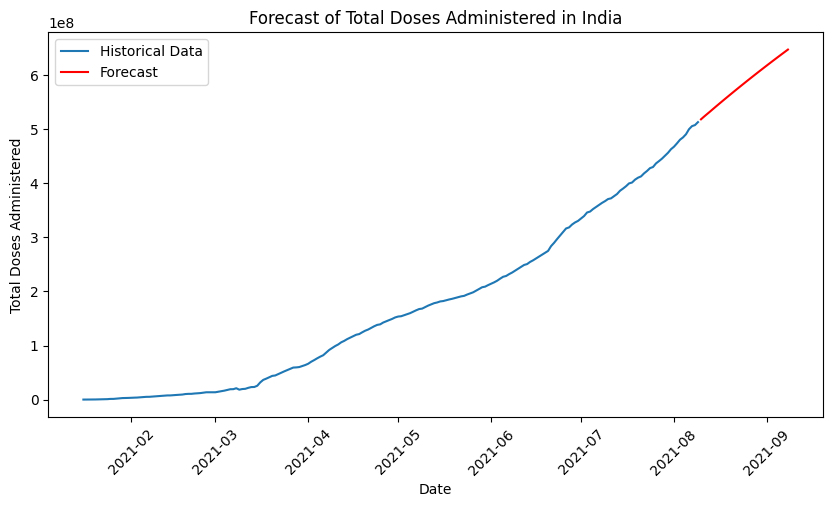

2021-08-10    5.183708e+08
2021-08-11    5.232849e+08
2021-08-12    5.279646e+08
2021-08-13    5.325980e+08
2021-08-14    5.374012e+08
2021-08-15    5.421131e+08
2021-08-16    5.467785e+08
2021-08-17    5.514180e+08
2021-08-18    5.560383e+08
2021-08-19    5.606395e+08
2021-08-20    5.652092e+08
2021-08-21    5.697533e+08
2021-08-22    5.742731e+08
2021-08-23    5.787681e+08
2021-08-24    5.832382e+08
2021-08-25    5.876831e+08
2021-08-26    5.921035e+08
2021-08-27    5.964995e+08
2021-08-28    6.008711e+08
2021-08-29    6.052184e+08
2021-08-30    6.095416e+08
2021-08-31    6.138408e+08
2021-09-01    6.181162e+08
2021-09-02    6.223679e+08
2021-09-03    6.265960e+08
2021-09-04    6.308007e+08
2021-09-05    6.349821e+08
2021-09-06    6.391402e+08
2021-09-07    6.432753e+08
2021-09-08    6.473875e+08
Freq: D, Name: predicted_mean, dtype: float64

In [14]:
print("Type of df:", type(df))
if isinstance(df, tuple):
    df = df[0]
print("Columns in dataset:", df.columns)
df['Updated On'] = pd.to_datetime(df['Updated On'])
df = df.sort_values(by='Updated On')
df_india = df[df['State'] == 'India']
if 'Updated On' not in df_india.columns:
    print("Error: 'Updated On' column not found in DataFrame!")
else:
    df_india.set_index('Updated On', inplace=True)

def forecast_total_doses():
    """Forecast total doses administered in India next month using ARIMA"""
    column_name = "Total Doses Administered"
    if column_name not in df_india.columns:
        print(f"Error: Column '{column_name}' not found in DataFrame!")
        print("Available columns:", df_india.columns)
        return

    data = df_india[column_name].dropna()
    model = ARIMA(data, order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=30)
    forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

    plt.figure(figsize=(10,5))
    plt.plot(data, label='Historical Data')
    plt.plot(forecast_dates, forecast, label='Forecast', color='red')
    plt.legend()
    plt.title("Forecast of Total Doses Administered in India")
    plt.xlabel("Date")
    plt.ylabel("Total Doses Administered")
    plt.xticks(rotation=45)
    plt.show()

    return forecast
forecast_total_doses()


2.Which state is expected to have the highest vaccination rate in the next three months?

In [23]:
print("Type of df:", type(df))
if isinstance(df, tuple):
    df = df[0]
print("Columns in dataset:", df.columns)
df['Updated On'] = pd.to_datetime(df['Updated On'])
df = df.sort_values(by='Updated On')
def forecast_statewise_vaccination():
    if 'State' not in df.columns:
        print("Error: 'State' column not found!")
        return
    states = df['State'].unique()
    forecast_results = {}
    for state in states:
        df_state = df[df['State'] == state].set_index('Updated On')
        if 'Total Doses Administered' not in df_state.columns:
            print(f"Skipping {state}: Column 'Total Doses Administered' missing.")
            continue
        
        data = df_state['Total Doses Administered'].dropna()
        
        if len(data) < 30: 
            print(f"Skipping {state}: Not enough data points.")
            continue
        
        model = ARIMA(data, order=(5,1,0))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=90) 
        forecast_results[state] = forecast.iloc[-1]  
    
    if forecast_results:
        highest_state = max(forecast_results, key=forecast_results.get)
        print(f"State expected to have highest vaccination rate: {highest_state}")
    else:
        highest_state = None
        print("No valid forecasts available.")

    return highest_state, forecast_results
forecast_statewise_vaccination()


Type of df: <class 'tuple'>
Columns in dataset: Index(['Updated On', 'State', 'Total Doses Administered', 'Sessions',
       ' Sites ', 'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated'],
      dtype='object')


C:\Users\VINOTH\AppData\Local\Temp\ipykernel_6744\1082385251.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Updated On'] = pd.to_datetime(df['Updated On'])
c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred freq

State expected to have highest vaccination rate: India


('India',
 {'India': np.float64(856596888.6786317),
  'Manipur': np.float64(1779371.0487061732),
  'Chandigarh': np.float64(1800944.7300657807),
  'Uttar Pradesh': np.float64(62544438.155628696),
  'Arunachal Pradesh': np.float64(1056074.5080573787),
  'Tamil Nadu': np.float64(36340206.54475373),
  'Andaman and Nicobar Islands': np.float64(331625.7615828236),
  'Puducherry': np.float64(845544.023873891),
  'Goa': np.float64(1934401.3782212902),
  'Jammu and Kashmir': np.float64(10928331.030689836),
  'Meghalaya': np.float64(1435397.3559408616),
  'Himachal Pradesh': np.float64(6967463.598258085),
  'Jharkhand': np.float64(13127311.441694979),
  'Mizoram': np.float64(905862.9052970187),
  'Gujarat': np.float64(72316675.20509888),
  'Tripura': np.float64(3276498.571777694),
  'Assam': np.float64(18512728.716730647),
  'Chhattisgarh': np.float64(13329582.630907187),
  'Sikkim': np.float64(672493.3088595688),
  'Ladakh': np.float64(267396.1648670597),
  'Lakshadweep': np.float64(75795.7149

3.How will the first-dose and second-dose administration trend in the next six months?

Type of df: <class 'tuple'>
Columns in dataset: Index(['Updated On', 'State', 'Total Doses Administered', 'Sessions',
       ' Sites ', 'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated'],
      dtype='object')


C:\Users\VINOTH\AppData\Local\Temp\ipykernel_6744\1309306680.py:20: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Updated On'] = pd.to_datetime(df['Updated On'])
c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


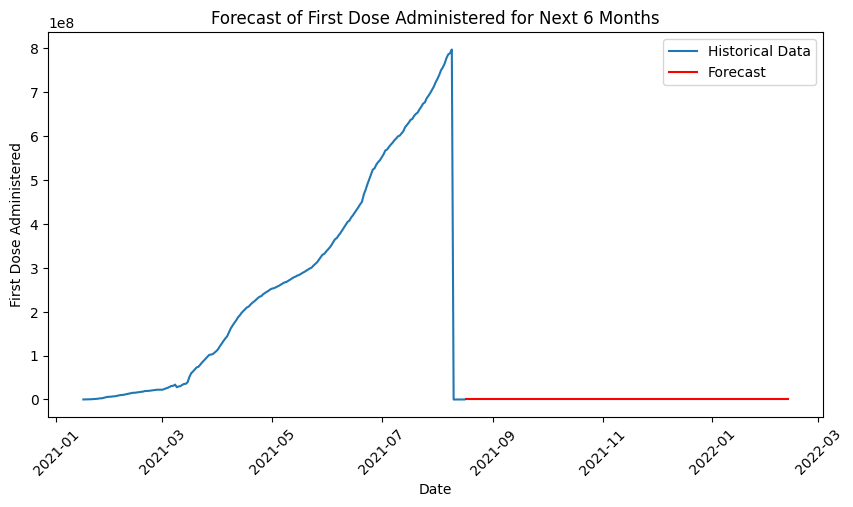

c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


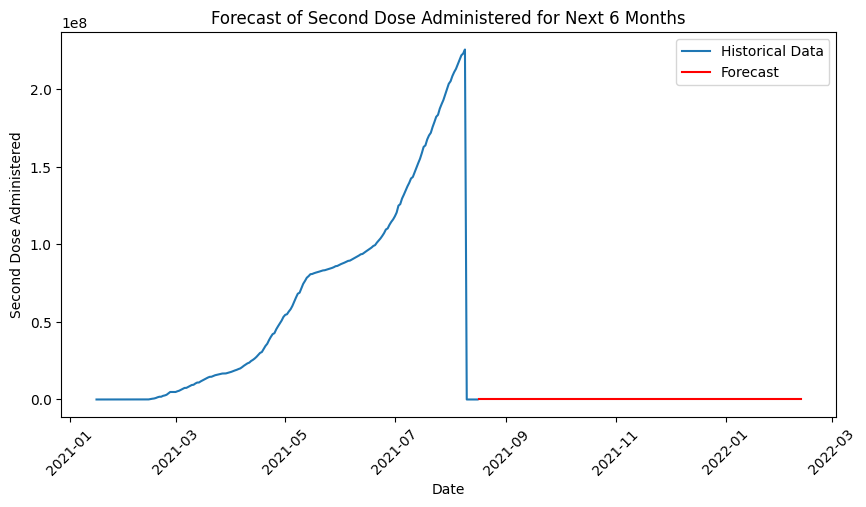

{'First Dose Administered': 2021-08-17   -5.681151e-15
 2021-08-18   -3.788984e-15
 2021-08-19   -4.333263e-15
 2021-08-20   -8.768254e-15
 2021-08-21   -1.080013e-14
                   ...     
 2022-02-08   -1.070375e-14
 2022-02-09   -1.070375e-14
 2022-02-10   -1.070375e-14
 2022-02-11   -1.070375e-14
 2022-02-12   -1.070375e-14
 Freq: D, Name: predicted_mean, Length: 180, dtype: float64,
 'Second Dose Administered': 2021-08-17    4.929231e-13
 2021-08-18    7.535563e-13
 2021-08-19    4.057404e-14
 2021-08-20   -2.660571e-13
 2021-08-21   -5.611750e-13
                   ...     
 2022-02-08   -5.497571e-13
 2022-02-09   -5.497571e-13
 2022-02-10   -5.497571e-13
 2022-02-11   -5.497571e-13
 2022-02-12   -5.497571e-13
 Freq: D, Name: predicted_mean, Length: 180, dtype: float64}

In [17]:

print("Type of df:", type(df))
if isinstance(df, tuple):
    df = df[0]
print("Columns in dataset:", df.columns)

df['Updated On'] = pd.to_datetime(df['Updated On'])
df = df.sort_values(by='Updated On')

def forecast_dose_trends():
    """Forecast first-dose and second-dose trends for the next six months."""
    dose_columns = ['First Dose Administered', 'Second Dose Administered']
    forecast_results = {}
    
    for dose in dose_columns:
        if dose not in df.columns:
            print(f"Skipping: Column '{dose}' missing.")
            continue
        
        data = df.groupby('Updated On')[dose].sum().dropna()
        
        if len(data) < 30: 
            print(f"Skipping {dose}: Not enough data points.")
            continue
        
        model = ARIMA(data, order=(5,1,0))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=180)  
        forecast_results[dose] = forecast
        forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=180, freq='D')
        plt.figure(figsize=(10,5))
        plt.plot(data, label='Historical Data')
        plt.plot(forecast_dates, forecast, label='Forecast', color='red')
        plt.legend()
        plt.title(f"Forecast of {dose} for Next 6 Months")
        plt.xlabel("Date")
        plt.ylabel(dose)
        plt.xticks(rotation=45)
        plt.show()
    
    return forecast_results
forecast_dose_trends()


4.Can we predict the gender-wise distribution of vaccines in the future?

c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


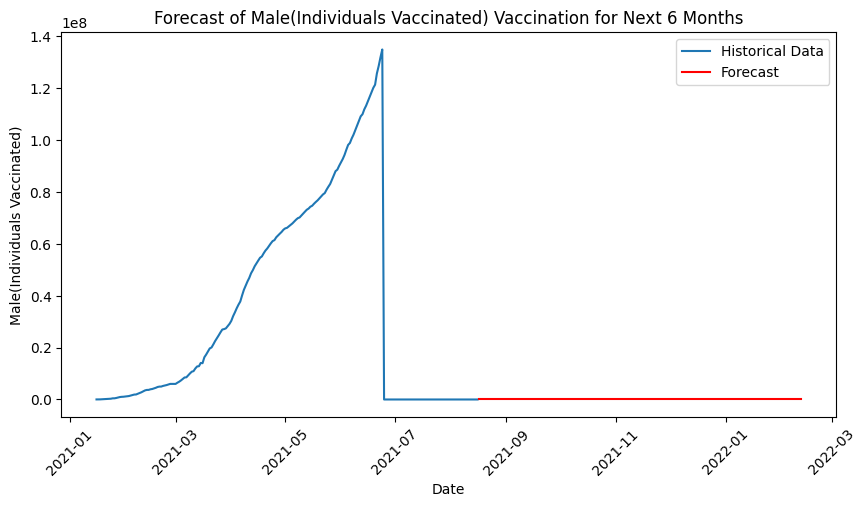

c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


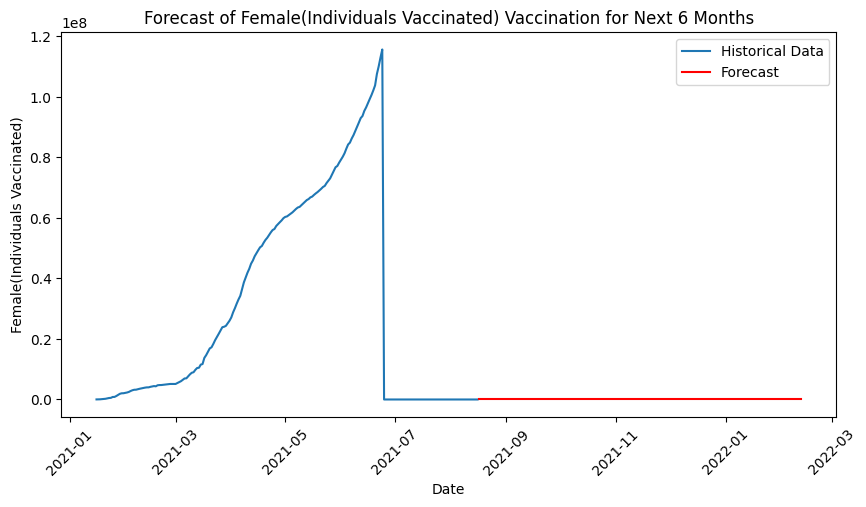

{'Male(Individuals Vaccinated)': 2021-08-17   -1.465825e-147
 2021-08-18   -1.446074e-147
 2021-08-19   -1.422995e-147
 2021-08-20   -1.404858e-147
 2021-08-21   -1.370775e-147
                   ...      
 2022-02-08   -1.372849e-147
 2022-02-09   -1.372849e-147
 2022-02-10   -1.372849e-147
 2022-02-11   -1.372849e-147
 2022-02-12   -1.372849e-147
 Freq: D, Name: predicted_mean, Length: 180, dtype: float64,
 'Female(Individuals Vaccinated)': 2021-08-17   -1.136281e-139
 2021-08-18   -1.120298e-139
 2021-08-19   -1.102292e-139
 2021-08-20   -1.087681e-139
 2021-08-21   -1.061233e-139
                   ...      
 2022-02-08   -1.057817e-139
 2022-02-09   -1.057817e-139
 2022-02-10   -1.057817e-139
 2022-02-11   -1.057817e-139
 2022-02-12   -1.057817e-139
 Freq: D, Name: predicted_mean, Length: 180, dtype: float64}

In [19]:
def forecast_gender_distribution():
    """Predict gender-wise distribution of vaccines in the future."""
    gender_columns = ['Male(Individuals Vaccinated)', 'Female(Individuals Vaccinated)']
    forecast_results = {}
    
    for gender in gender_columns:
        if gender not in df.columns:
            print(f"Skipping: Column '{gender}' missing.")
            continue
        
        data = df.groupby('Updated On')[gender].sum().dropna()
        
        if len(data) < 30:
            print(f"Skipping {gender}: Not enough data points.")
            continue
        
        model = ARIMA(data, order=(5,1,0))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=180)  
        
        forecast_results[gender] = forecast
        
        forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=180, freq='D')
        plt.figure(figsize=(10,5))
        plt.plot(data, label='Historical Data')
        plt.plot(forecast_dates, forecast, label='Forecast', color='red')
        plt.legend()
        plt.title(f"Forecast of {gender} Vaccination for Next 6 Months")
        plt.xlabel("Date")
        plt.ylabel(gender)
        plt.xticks(rotation=45)
        plt.show()
    
    return forecast_results

forecast_gender_distribution()